# Lab 3
## More EDA: improving expertise in loading, cleaning, and analyzing data

The objective of Lab 3 is for you to become more proficient in obtaining and working with different types of data. A particular emphasis will be on dealing with text data.

This lab assignment will have 3 components. 

## Lab 3.A. Complete tutorials from Harvard's CS109 Lab 1

Go to https://github.com/cs109/2015lab1 and download the following files in your local Lab3 directory:
- https://github.com/cs109/2015lab1/blob/master/Lab1-babypython.ipynb
- https://github.com/cs109/2015lab1/blob/master/Lab1-pythonpandas.ipynb
- https://github.com/cs109/2015lab1/blob/master/all.csv

Study all the code and run every block of code from the *babypython* tutorial. It covers many of the things you already learned in your Labs 1 and 2, so it is a good refresher. However, there are some new things. In particular, you will learn how to load a pure textual file and process it to find counts of all the unique words (also called the tokens) in the text. When going over this tutorial, you can disregard the following blocks of code: 10, 11, 21-23.

Study all the code and run every block of code from the *pythonpandas* tutorial. Again, you will find there many things you already know. However, the novelty here is in processing and analysis of a slightly messy tabular data than was the case with the *Auto MPG data*. When going over this code you can disregard code block 24.

**Deliverable**: submit the two .ipynb files after you have run all the lines of code. We will appreciate if we see that you put some extra effort, such as trying to modify existing code, enter new lines of code, or provide comments in the text. Make sure any modifications are easily visible by us for the grading purposes.

## Lab 3.B. Movie Lens Data

In this part of the lab, you will be working on an exercise that is a slightly modified and shortened version of https://github.com/cs109/2015/blob/master/Lectures/02-DataScrapingQuizzes.ipynb. In particular, you will learn how to load and analyze MoviLens data, which contains ratings of multiple movies by multiple users.

**The MovieLens data**

http://grouplens.org/datasets/movielens/

Take some time to learn about the data, because it will be helpful to do the assignment.


In [136]:
## all imports
from IPython.display import HTML
import numpy as np
import urllib2
import bs4 #this is beautiful soup
import time
import operator
import socket
import cPickle
import re # regular expressions

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

In [137]:
# Read the user data:
#   pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']

users = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.user', 
    sep='|', names=u_cols)

users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [138]:
# Read the ratings:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.data', 
    sep='\t', names=r_cols)

ratings.head() 

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [139]:
# Read the movies data
#  the movies file contains columns indicating the movie's genres
#  let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 
            'video_release_date', 'imdb_url']

movies = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.item', 
    sep='|', names=m_cols, usecols=range(5))

movies.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


Get information about the data:

In [140]:
print movies.dtypes
print
print movies.describe()
# *** Why only those two columns? ***

movie_id                int64
title                  object
release_date           object
video_release_date    float64
imdb_url               object
dtype: object

          movie_id  video_release_date
count  1682.000000                 0.0
mean    841.500000                 NaN
std     485.695893                 NaN
min       1.000000                 NaN
25%     421.250000                 NaN
50%     841.500000                 NaN
75%    1261.750000                 NaN
max    1682.000000                 NaN


Selecting data:

* DataFrame => group of Series with shared index
* single DataFrame column => Series

In [141]:
users.head()
users['occupation'].head()
## *** Where did the nice design go? ***
columns_you_want = ['occupation', 'sex'] 
users[columns_you_want].head()

print users.head()

print users.iloc[3]

   user_id  age sex  occupation zip_code
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067
3        4   24   M  technician    43537
4        5   33   F       other    15213
user_id                4
age                   24
sex                    M
occupation    technician
zip_code           43537
Name: 3, dtype: object


Filtering data:

Select users older than 25

In [142]:
oldUsers = users[users.age > 25]
oldUsers.head()

,user_id,age,sex,occupation,zip_code
1,2,53,F,other,94043
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201


**Question 1**: 
* show users aged 40 and male
* show the mean age of female programmers

In [143]:
# users aged 40 AND male
# your code here
older_men_df = users[(users.age == 40) & (users.sex == 'M')]#there were none greater than 4.5!


## users who are female and programmers
# your code here
female_programmers_df = users[(users.sex == 'F') & (users.occupation == 'programmer')]

## show statistic summary or compute mean
print('Older men mean:')
print(older_men_df.mean())

print('\nFemale programmers mean:')
print(female_programmers_df.mean())
# your code here

Older men mean:
user_id     4.157857e+02
age         4.000000e+01
zip_code    1.527458e+67
dtype: float64

Female programmers mean:
user_id     4.111667e+02
age         3.216667e+01
zip_code    1.578393e+29
dtype: float64


Find Diligent Users

- split data per user ID
- count ratings
- combine result



In [144]:
print ratings.head()
## split data
grouped_data = ratings.groupby('user_id')
#grouped_data = ratings['movie_id'].groupby(ratings['user_id'])

## count and combine
ratings_per_user = grouped_data.count()

ratings_per_user.head(5)

   user_id  movie_id  rating  unix_timestamp
0      196       242       3       881250949
1      186       302       3       891717742
2       22       377       1       878887116
3      244        51       2       880606923
4      166       346       1       886397596


,movie_id,rating,unix_timestamp
user_id,,,
1,272,272,272
2,62,62,62
3,54,54,54
4,24,24,24
5,175,175,175


**Question 2**:
* get the average rating per movie
* advanced: get the movie titles with the highest average rating

In [145]:
mean_ratings = ratings.rating.groupby(ratings.movie_id)

In [146]:
## split data
grouped_ratings = ratings.rating.groupby(ratings.movie_id)

## average and combine
# your code here
average_ratings = grouped_ratings.mean()

# get the maximum rating
# your code here
max_rating = grouped_ratings.max()

# get movie ids with that rating
good_movie_ids = average_ratings[average_ratings == max_rating].index

print "Good movie ids:"
print good_movie_ids

print "\nBest movie titles"
best_movie_titles = movies[movies.movie_id.isin(good_movie_ids)].title
print best_movie_titles.head()

# get number of ratings per movie
print "\nNumber of ratings per movie"
print grouped_ratings.count().head()

Good movie ids:
Int64Index([ 314,  437,  439,  599,  677,  711,  784,  814,  830,  852,
            ...
            1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682],
           dtype='int64', name=u'movie_id', length=166)

Best movie titles
313          3 Ninjas: High Noon At Mega Mountain (1998)
436              Amityville 1992: It's About Time (1992)
438                  Amityville: A New Generation (1993)
598    Police Story 4: Project S (Chao ji ji hua) (1993)
676                          Fire on the Mountain (1996)
Name: title, dtype: object

Number of ratings per movie
movie_id
1    452
2    131
3     90
4    209
5     86
Name: rating, dtype: int64


**Question 3**:
* get the average rating per user
* list all occupations and if they are male or female dominant

In [147]:
# get the average rating per user
grouped_ratings = ratings.rating.groupby(ratings.user_id)
print grouped_ratings.mean().head()

# list all occupations and if they are male or female dominant
# Split by sex and occupation
job_group =  users.sex.groupby(users.occupation)
female_dominated = job_group.apply(lambda f: sum(f == 'F') > sum(f == 'M'))
print '\nIs female dominated:'
print female_dominated

print '\nnumber of male users: '
print sum(users['sex'] == 'M')

print '\nnumber of female users: '
print sum(users['sex'] == 'F')

user_id
1    3.610294
2    3.709677
3    2.796296
4    4.333333
5    2.874286
Name: rating, dtype: float64

Is female dominated:
occupation
administrator    False
artist           False
doctor           False
educator         False
engineer         False
entertainment    False
executive        False
healthcare        True
homemaker         True
lawyer           False
librarian         True
marketing        False
none             False
other            False
programmer       False
retired          False
salesman         False
scientist        False
student          False
technician       False
writer           False
Name: sex, dtype: bool

number of male users: 
670

number of female users: 
273


In [148]:
users.groupby(users.occupation)

In [149]:
job_group =  users.groupby(users.occupation)
for j in job_group:
    print j

    

('administrator',      user_id  age sex     occupation zip_code
6          7   57   M  administrator    91344
7          8   36   M  administrator    05201
33        34   38   F  administrator    42141
41        42   30   M  administrator    17870
47        48   45   M  administrator    12550
61        62   27   F  administrator    97214
71        72   48   F  administrator    73034
77        78   26   M  administrator    61801
78        79   39   F  administrator    03755
79        80   34   F  administrator    52241
85        86   26   M  administrator    46005
86        87   47   M  administrator    89503
88        89   43   F  administrator    68106
94        95   31   M  administrator    10707
117      118   21   M  administrator    90210
130      131   59   F  administrator    15237
150      151   38   F  administrator    48103
162      163   49   M  administrator    97212
173      174   30   F  administrator    52302
179      180   22   F  administrator    60202
189      190   3

**Question 4**:
- produce a 1-page document that uses a combination of text, tables, and figures that provide some interesting insights about the Movie Lens data. You should feel free to use outside sources to produce the report, as long as you acknowledge your sources. 

## Lab 3.C. HTML Data

In this part of the lab, you will be also be working on an exercise that is a slightly modified and shortened version of https://github.com/cs109/2015/blob/master/Lectures/02-DataScrapingQuizzes.ipynb. In particular, you will learn how to load and analyze html data.

HTML:
* HyperText Markup Language
* standard for creating webpages
* HTML tags 
    - have angle brackets
    - typically come in pairs


In [150]:
htmlString = """<!DOCTYPE html>
<html>
  <head>
    <title>This is a title</title>
  </head>
  <body>
    <h2> Test </h2>
    <p>Hello world!</p>
  </body>
</html>"""

htmlOutput = HTML(htmlString)
htmlOutput

Useful Tags:

* heading
`<h1></h1> ... <h6></h6>`

* paragraph
`<p></p>` 

* line break
`<br>` 

* link with attribute

`<a href="http://www.example.com/">An example link</a>`

### Scraping with Python:

Example of a simple webpage: http://www.crummy.com/software/BeautifulSoup

Good news: 
    - some browsers help
    - look for: inspect element
    - need only basic html
    - try 'Ctrl-Shift I' in Chrome
    - try 'Command-Option I' in Safari
   
Different useful libraries:
    - urllib
    - beautifulsoup
    - pattern
    - soupy
    - LXML
    - ...
 
The following cell just defines a url as a string and then reads the data from that url using the `urllib` library. If you uncomment the print command you see that we got the whole HTML content of the page into the string variable source.

In [151]:
url = 'http://www.crummy.com/software/BeautifulSoup'
source = urllib2.urlopen(url).read()
print source

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN"
"http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
<title>Beautiful Soup: We called him Tortoise because he taught us.</title>
<link rev="made" href="mailto:leonardr@segfault.org">
<link rel="stylesheet" type="text/css" href="/nb/themes/Default/nb.css">
<meta name="Description" content="Beautiful Soup: a library designed for screen-scraping HTML and XML.">
<meta name="generator" content="Markov Approximation 1.4 (module: leonardr)">
<meta name="author" content="Leonard Richardson">
</head>
<body bgcolor="white" text="black" link="blue" vlink="660066" alink="red">
<img align="right" src="10.1.jpg" width="250"><br />

<p>You didn't write that awful page. You're just trying to get some
data out of it. Beautiful Soup is here to help. Since 2004, it's been
saving programmers hours or days of work on quick-turnaround
screen scraping projects.</p>

<

**Question 5**:

* Is the word 'Alice' mentioned on the beautiful soup homepage?
* How often does the word 'Soup' occur on the site?
    - hint: use `.count()`
* At what index occurs the substring 'alien video games' ?
    - hint: use `.find()`

In [152]:
## is 'Alice' in source?
print 'Alice' in source

## count occurences of 'Soup'
print source.count('Soup')

## find index of 'alien video games'
print source.find('alien video games')

False
43
-1


**Beautiful Soup**

* designed to make your life easier
* many good functions for parsing html code

Some examples:

In [153]:
## get bs4 object
soup = bs4.BeautifulSoup(source, "html5lib")
 
## compare the two print statements
#print soup
#print soup.prettify()

## show how to find all a tags
soup.findAll('a')

## ***Why does this not work? ***
#soup.findAll('Soup')

[<a href="bs4/download/"><h1>Beautiful Soup</h1></a>,
 <a href="#Download">Download</a>,
 <a href="bs4/doc/">Documentation</a>,
 <a href="#HallOfFame">Hall of Fame</a>,
 <a href="https://code.launchpad.net/beautifulsoup">Source</a>,
 <a href="https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup">Discussion group</a>,
 <a href="zine/">Zine</a>,
 <a href="zine/"><i>Tool Safety</i></a>,
 <a href="https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup">the discussion\ngroup</a>,
 <a href="https://bugs.launchpad.net/beautifulsoup/">file it</a>,
 <a href="http://lxml.de/">lxml</a>,
 <a href="http://code.google.com/p/html5lib/">html5lib</a>,
 <a href="bs4/doc/">Read more.</a>,
 <a name="Download"></a>,
 <a name="Download">Download Beautiful Soup</a>,
 <a href="bs4/download/">Beautiful Soup\n4.6.0</a>,
 <a href="http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html">Here's\nthe Beautiful Soup 3 documentation.</a>,
 <a href="download/3.x/BeautifulSoup-3.2.1.t

More examples:

In [154]:
## get attribute value from an element:
## find tag: this only returns the first occurrence, not all tags in the string
first_tag = soup.find('a')

## get attribute `href`
first_tag.get('href')

## get all links in the page
link_list = [l.get('href') for l in soup.findAll('a')]
link_list

[u'bs4/download/',
 u'#Download',
 u'bs4/doc/',
 u'#HallOfFame',
 u'https://code.launchpad.net/beautifulsoup',
 u'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 u'zine/',
 u'zine/',
 u'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 u'https://bugs.launchpad.net/beautifulsoup/',
 u'http://lxml.de/',
 u'http://code.google.com/p/html5lib/',
 u'bs4/doc/',
 None,
 None,
 u'bs4/download/',
 u'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 u'download/3.x/BeautifulSoup-3.2.1.tar.gz',
 None,
 None,
 u'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 u'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py',
 u'http://www.harrowell.org.uk/viktormap.html',
 u'http://svn.python.org/view/tracker/importer/',
 u'http://www2.ljworld.com/',
 u'http://www.b-list.org/weblog/2010/nov/02/news-done-broke/',
 u'http://esrl.noaa.gov/gsd/fab/',
 u'http://laps.noaa.gov/topograbber/',
 u'http:/

In [155]:
## filter all external links
# create an empty list to collect the valid links
external_links = []

# write a loop to filter the links
# if it starts with 'http' we are happy
for l in link_list:
    if l[:4] == 'http':
        external_links.append(l)

# this throws an error! It says something about 'NoneType'

TypeError: 'NoneType' object has no attribute '__getitem__'

In [156]:
# lets investigate. Have a close look at the link_list:
link_list

# Seems that there are None elements!
# Let's verify
print sum([l is None for l in link_list])

# So there are two elements in the list that are None!

4


In [157]:
# Let's filter those objects out in the for loop
external_links = []

# write a loop to filter the links
# if it is not None and starts with 'http' we are happy
for l in link_list:
    if l is not None and l[:4] == 'http':
        external_links.append(l)
        
external_links

[u'https://code.launchpad.net/beautifulsoup',
 u'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 u'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 u'https://bugs.launchpad.net/beautifulsoup/',
 u'http://lxml.de/',
 u'http://code.google.com/p/html5lib/',
 u'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 u'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 u'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py',
 u'http://www.harrowell.org.uk/viktormap.html',
 u'http://svn.python.org/view/tracker/importer/',
 u'http://www2.ljworld.com/',
 u'http://www.b-list.org/weblog/2010/nov/02/news-done-broke/',
 u'http://esrl.noaa.gov/gsd/fab/',
 u'http://laps.noaa.gov/topograbber/',
 u'http://groups.google.com/group/beautifulsoup/',
 u'https://launchpad.net/beautifulsoup',
 u'https://code.launchpad.net/beautifulsoup/',
 u'https://bugs.launchpad.net/beautifulsoup/',
 u'http://creati

*Note*: The above `if` condition works because of lazy evaluation in Python. The `and` statement becomes `False` if the first part is `False`, so there is no need to ever evaluate the second part. Thus a `None` entry in the list gets never asked about its first four characters. 

In [158]:
# and we can put this in a list comprehension as well, it almost reads like 
# a sentence.

[l for l in link_list if l is not None and l.startswith('http')]

[u'https://code.launchpad.net/beautifulsoup',
 u'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 u'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 u'https://bugs.launchpad.net/beautifulsoup/',
 u'http://lxml.de/',
 u'http://code.google.com/p/html5lib/',
 u'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 u'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 u'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py',
 u'http://www.harrowell.org.uk/viktormap.html',
 u'http://svn.python.org/view/tracker/importer/',
 u'http://www2.ljworld.com/',
 u'http://www.b-list.org/weblog/2010/nov/02/news-done-broke/',
 u'http://esrl.noaa.gov/gsd/fab/',
 u'http://laps.noaa.gov/topograbber/',
 u'http://groups.google.com/group/beautifulsoup/',
 u'https://launchpad.net/beautifulsoup',
 u'https://code.launchpad.net/beautifulsoup/',
 u'https://bugs.launchpad.net/beautifulsoup/',
 u'http://creati

Parsing the Tree:

In [159]:
# redifining `s` without any line breaks
s = """<!DOCTYPE html><html><head><title>This is a title</title></head><body><h3> Test </h3><p>Hello world!</p></body></html>"""
## get bs4 object
tree = bs4.BeautifulSoup(s)

## get html root node
root_node = tree.html

## get head from root using contents
head = root_node.contents[0]

## get body from root
body = root_node.contents[1]

## could directly access body
tree.body

<body><h3> Test </h3><p>Hello world!</p></body>

**Question 6**:

* Find the `h3` tag by parsing the tree starting at `body`
* Create a list of all __Hall of Fame__ entries listed on the Beautiful Soup webpage
    - hint: it is the only unordered list in the page (tag `ul`)

In [160]:
## get h3 tag from body
h3 = body.h3
print(h3)

## use ul as entry point
entry_ul = soup.find('ul')
print entry_ul


## get hall of fame list from entry point
## skip the first entry 
hall_of_fame = entry_ul.contents[1:]
print hall_of_fame

## reformat into a list containing strings
## it is ok to have a list of lists
tmp=[]
for li in hall_of_fame:
    tmp.append(li.contents)
print tmp


<h3> Test </h3>
<ul>

<li><a href="http://www.nytimes.com/2007/10/25/arts/design/25vide.html">"Movable
 Type"</a>, a work of digital art on display in the lobby of the New
 York Times building, uses Beautiful Soup to scrape news feeds.

</li><li>Reddit uses Beautiful Soup to <a href="https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py">parse
a page that's been linked to and find a representative image</a>.

</li><li>Alexander Harrowell uses Beautiful Soup to <a href="http://www.harrowell.org.uk/viktormap.html">track the business
 activities</a> of an arms merchant.

</li><li>The developers of Python itself used Beautiful Soup to <a href="http://svn.python.org/view/tracker/importer/">migrate the Python
bug tracker from Sourceforge to Roundup</a>.

</li><li>The <a href="http://www2.ljworld.com/">Lawrence Journal-World</a>
uses Beautiful Soup to <a href="http://www.b-list.org/weblog/2010/nov/02/news-done-broke/">gather
statewide election resul

`tmp` now is actually a list of lists containing the hall of fame entries. 
Here is some advanced Python on how to print really just one entry per list item.

The cool things about this are: 
* The use of `""` to just access the `join` function of strings.
* The `join` function itself
* that you can actually have two nested for loops in a list comprehension

In [161]:
test =  ["".join(str(a) for a in sublist) for sublist in tmp]
print '\n'.join(test)

<a href="http://www.nytimes.com/2007/10/25/arts/design/25vide.html">"Movable
 Type"</a>, a work of digital art on display in the lobby of the New
 York Times building, uses Beautiful Soup to scrape news feeds.


Reddit uses Beautiful Soup to <a href="https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py">parse
a page that's been linked to and find a representative image</a>.


Alexander Harrowell uses Beautiful Soup to <a href="http://www.harrowell.org.uk/viktormap.html">track the business
 activities</a> of an arms merchant.


The developers of Python itself used Beautiful Soup to <a href="http://svn.python.org/view/tracker/importer/">migrate the Python
bug tracker from Sourceforge to Roundup</a>.


The <a href="http://www2.ljworld.com/">Lawrence Journal-World</a>
uses Beautiful Soup to <a href="http://www.b-list.org/weblog/2010/nov/02/news-done-broke/">gather
statewide election results</a>.


The <a href="http://esrl.noaa.gov/gsd/fab/">NOAA

**Question 7**:
- Explain in detail what is Python doing in the previous line

**Question 8**:
- Plot a histogram of the count of the 20 most common words in the html file
- Plot a histogram of the count of the 20 most common words in the visible part (what is displayed in the browser) of the html file

**Deliverable**: For Lab 3.B and 3.C submit a modified version fo this .ipynb file that contains all the answers to the quesitons

**Answer 7:** In the last two lines, python seperates each list in temp and joins them using "". It turns the list of list into a list of strings and then into a final string. It adds a new line between each list of strings when joining them so that the final string will become spaced out.

**Answer 8:**

Text(0.5,0,u'Word')

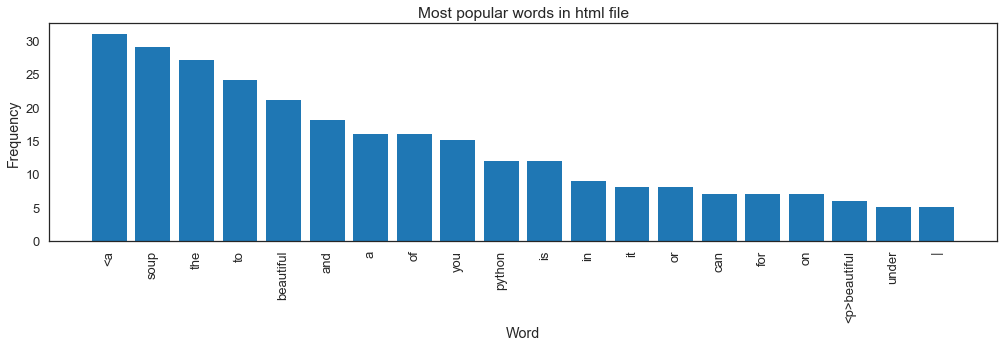

In [162]:
# Note: Much of this code for problem 8 is taken from the babypython example
# Note2: Bar graphs were using in place of a histogram since it made more sense

# Histogram for 20 most common words in html file4
tokens = source.split()
tokens = [word.lower() for word in tokens]
wordtokens = set(tokens)
token_dict = {}
for word in wordtokens:
    token_dict[word] = tokens.count(word)
word_freq = sorted(token_dict.iteritems(), key= lambda (k,v):v, reverse=True)[:20]

pos = np.arange(len(word_freq))
plt.figure(figsize=(17,4))
plt.bar(pos,[e[1] for e in word_freq])
plt.xticks(pos, [e[0] for e in word_freq],rotation=90);
plt.title("Most popular words in html file")
plt.ylabel("Frequency")
plt.xlabel("Word")

Text(0.5,0,u'Word')

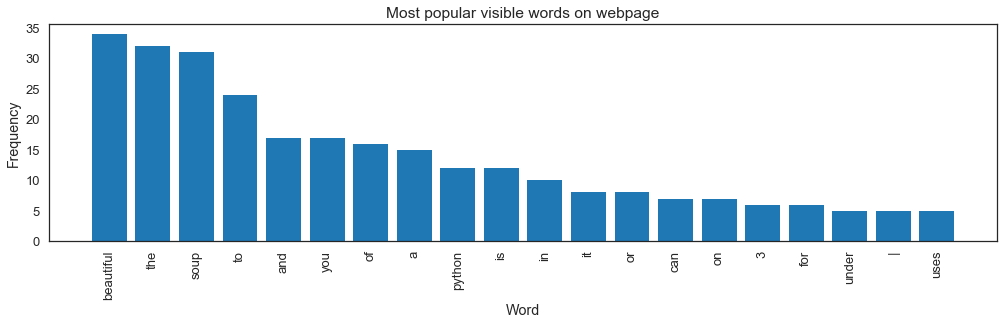

In [163]:
# Histogram of the count of the 20 most common words in the visible part of the html file

for script in soup(["script", "style"]):
    script.extract()

tokens = [word.lower() for word in soup.get_text().split() ]
word_tokens = set(tokens)

token_dict = {}
for word in word_tokens:
    token_dict[word]=tokens.count(word)
words_cleaned = sorted(token_dict.iteritems(), key=lambda (k,v):v, reverse=True)[:20]

pos = np.arange(len(words_cleaned))
plt.figure(figsize=(17,4))
plt.bar(pos,[e[1] for e in words_cleaned])
plt.xticks(pos, [e[0] for e in words_cleaned],rotation=90);
plt.title("Most popular visible words on webpage")
plt.ylabel("Frequency")
plt.xlabel("Word")